In [2]:
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api
import seaborn as sns
from plotnine import *
from statsmodels.graphics.factorplots import interaction_plot
from sklearn.linear_model import LinearRegression

In [19]:
gdp_states = requests.get('https://raw.githubusercontent.com/wadoodbutt/wadoodbutt.github.io/main/datasets/statesgdp.csv')

file_gdp_states = io.StringIO(gdp_states.text)

df_gdp_states = pd.read_csv(file_gdp_states, sep=',')
df_gdp_states.columns = df_gdp_states.iloc[3]
df_gdp_states = df_gdp_states.drop([0,1,2,3])
df_gdp_states = df_gdp_states.reset_index(drop=True)
df_gdp_states = df_gdp_states.drop(df_gdp_states.iloc[:, 4:44], axis=1)
print(df_gdp_states.iloc[251])
df_gdp_states.head()

3
Country Name          United States
Country Code                    USA
Indicator Name    GDP (current US$)
Indicator Code       NY.GDP.MKTP.CD
2000.0             10250900000000.0
2001.0             10581900000000.0
2002.0             10929100000000.0
2003.0             11456400000000.0
2004.0             12217200000000.0
2005.0             13039200000000.0
2006.0             13815600000000.0
2007.0             14474200000000.0
2008.0             14769900000000.0
2009.0             14478100000000.0
2010.0             15049000000000.0
2011.0             15599700000000.0
2012.0             16254000000000.0
2013.0             16843200000000.0
2014.0             17550700000000.0
2015.0             18206000000000.0
2016.0             18695100000000.0
2017.0             19477300000000.0
2018.0             20533100000000.0
2019.0             21381000000000.0
2020.0             21060500000000.0
2021.0             23315100000000.0
Name: 251, dtype: object


3,Country Name,Country Code,Indicator Name,Indicator Code,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,1.873184e+09,1.896648e+09,1.962011e+09,2.044134e+09,2.254749e+09,2.359777e+09,...,2.615084e+09,2.727933e+09,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.202235e+09,3.368970e+09,2.610039e+09,3.126019e+09
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.839380e+11,2.588300e+11,2.648810e+11,3.526740e+11,4.388530e+11,5.122340e+11,...,9.720020e+11,9.826770e+11,1.003400e+12,9.231440e+11,8.898590e+11,1.030480e+12,1.016700e+12,1.009050e+12,9.341790e+11,1.089450e+12
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,3.854235e+09,4.539501e+09,5.220824e+09,6.226199e+09,...,2.020357e+10,2.056449e+10,2.055058e+10,1.999816e+10,1.801956e+10,1.889635e+10,1.841885e+10,1.890449e+10,2.014344e+10,1.478686e+10
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.404100e+11,1.467800e+11,1.766060e+11,2.044710e+11,2.534720e+11,3.100940e+11,...,7.360400e+11,8.322170e+11,8.924980e+11,7.669580e+11,6.905450e+11,6.837480e+11,7.663600e+11,7.947190e+11,7.848000e+11,8.401870e+11
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,9.129595e+09,8.936064e+09,1.528559e+10,1.781270e+10,2.355205e+10,3.697092e+10,...,1.249980e+11,1.334020e+11,1.372440e+11,8.721930e+10,4.984049e+10,6.897277e+10,7.779294e+10,6.930911e+10,5.361907e+10,6.740429e+10


In [33]:
sui_states = requests.get('https://raw.githubusercontent.com/wadoodbutt/wadoodbutt.github.io/main/datasets/statessuicide.csv')

file_sui_states = io.StringIO(sui_states.text)

df_sui_states = pd.read_csv(file_sui_states, sep=',')
df_sui_states.columns = df_sui_states.iloc[3]
df_sui_states = df_sui_states.drop([0,1,2,3])
df_sui_states = df_sui_states.reset_index(drop=True)
df_sui_states = df_sui_states.drop(df_sui_states.iloc[:, 4:44], axis=1)

print(df_sui_states.iloc[251])

3
Country Name                                        United States
Country Code                                                  USA
Indicator Name    Suicide mortality rate (per 100,000 population)
Indicator Code                                     SH.STA.SUIC.P5
2000.0                                                       11.0
2001.0                                                       11.4
2002.0                                                       11.8
2003.0                                                       11.7
2004.0                                                       11.9
2005.0                                                       11.9
2006.0                                                       12.1
2007.0                                                       12.4
2008.0                                                       12.7
2009.0                                                       12.8
2010.0                                                       13.1
2011.0  

       suicide               gdp
3                               
2000.0    11.0  10250900000000.0
2001.0    11.4  10581900000000.0
2002.0    11.8  10929100000000.0
2003.0    11.7  11456400000000.0
2004.0    11.9  12217200000000.0
2005.0    11.9  13039200000000.0
2006.0    12.1  13815600000000.0
2007.0    12.4  14474200000000.0
2008.0    12.7  14769900000000.0
2009.0    12.8  14478100000000.0
2010.0    13.1  15049000000000.0
2011.0    13.4  15599700000000.0
2012.0    13.5  16254000000000.0
2013.0    13.5  16843200000000.0
2014.0    14.0  17550700000000.0
2015.0    14.4  18206000000000.0
2016.0    15.1  18695100000000.0
2017.0    15.9  19477300000000.0
2018.0    15.7  20533100000000.0
2019.0    16.1  21381000000000.0
2020.0     NaN  21060500000000.0
2021.0     NaN  23315100000000.0


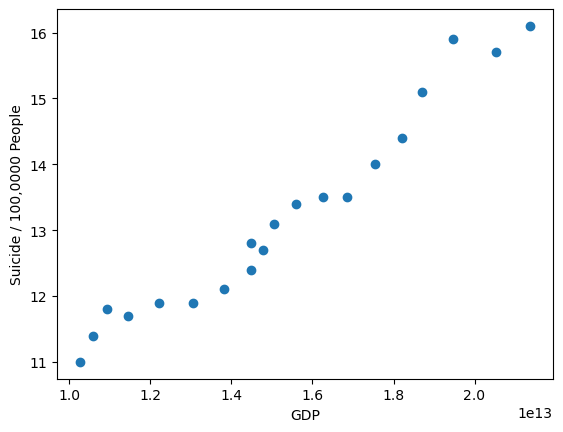

In [65]:
df_final = pd.DataFrame()
df_final['suicide'] = df_sui_states.iloc[251, 4:26].transpose() 
df_final['gdp'] = df_gdp_states.iloc[251, 4:26].transpose()
plt.scatter(x=df_final['gdp'], y=df_final['suicide'])
plt.xlabel("GDP")
plt.ylabel("Suicide / 100,0000 People")
print(df_final)

In [66]:
gini_data = requests.get('https://raw.githubusercontent.com/wadoodbutt/wadoodbutt.github.io/main/datasets/gini_global_data.csv')

file_gini = io.StringIO(gini_data.text)

df_gini = pd.read_csv(file_gini, sep=',')
df_gini.columns = df_gini.iloc[3]
df_gini = df_gini.drop([0,1,2,3])
df_gini = df_gini.reset_index(drop=True)
df_gini = df_gini.drop(df_gini.iloc[:, 4:44], axis=1)
print(df_gini.iloc[251])
df_gini.head()

3
Country Name      United States
Country Code                USA
Indicator Name       Gini index
Indicator Code      SI.POV.GINI
2000.0                     40.1
2001.0                     40.6
2002.0                     40.4
2003.0                     40.8
2004.0                     40.3
2005.0                     41.0
2006.0                     41.4
2007.0                     40.8
2008.0                     40.8
2009.0                     40.6
2010.0                     40.0
2011.0                     40.9
2012.0                     40.9
2013.0                     40.7
2014.0                     41.5
2015.0                     41.2
2016.0                     41.1
2017.0                     41.2
2018.0                     41.4
2019.0                     41.5
2020.0                     39.7
2021.0                      NaN
Name: 251, dtype: object


3,Country Name,Country Code,Indicator Name,Indicator Code,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
0,Aruba,ABW,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Gini index,SI.POV.GINI,52.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,51.3,NaN,NaN,NaN


       suicide  gini
3                   
2000.0    11.0  40.1
2001.0    11.4  40.6
2002.0    11.8  40.4
2003.0    11.7  40.8
2004.0    11.9  40.3
2005.0    11.9  41.0
2006.0    12.1  41.4
2007.0    12.4  40.8
2008.0    12.7  40.8
2009.0    12.8  40.6
2010.0    13.1  40.0
2011.0    13.4  40.9
2012.0    13.5  40.9
2013.0    13.5  40.7
2014.0    14.0  41.5
2015.0    14.4  41.2
2016.0    15.1  41.1
2017.0    15.9  41.2
2018.0    15.7  41.4
2019.0    16.1  41.5
2020.0     NaN  39.7
2021.0     NaN   NaN


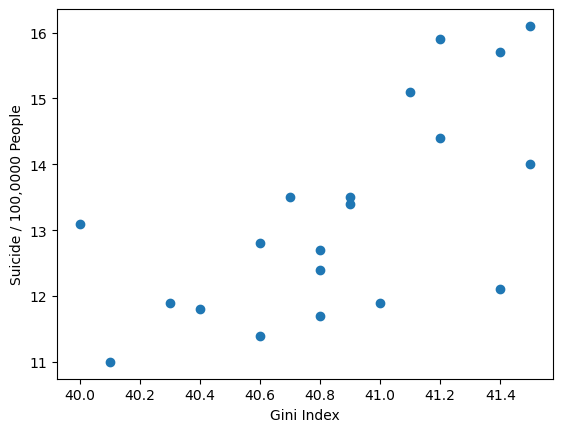

In [69]:
df_final_g = pd.DataFrame()
df_final_g['suicide'] = df_sui_states.iloc[251, 4:26].transpose() 
df_final_g['gini'] = df_gini.iloc[251, 4:26].transpose()
plt.scatter(x=df_final_g['gini'], y=df_final_g['suicide'])
plt.xlabel("Gini Index")
plt.ylabel("Suicide / 100,0000 People")
print(df_final_g)